# Identifying Vacant Parcels

This program will use building footprints from OpenStreetMaps and Parcel boundaries from the official data portals to identify parcels that are mostly vacant.

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)

import pandas as pd, numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point
import geopandas

import matplotlib.pyplot as plt

## First Step: Import all the data

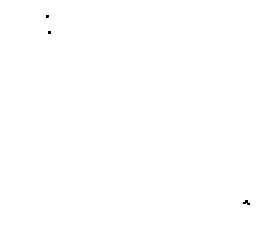

In [54]:
footprints = geopandas.read_file('case_studies/all_build.shp')

f, ax = plt.subplots(1, figsize=(4, 4))
ax = footprints.plot(ax = ax, color='white', edgecolor='black', linewidth=1)
ax.set_axis_off()
plt.show()

In [55]:
footprints['footprint'] = 'footprint'
footprints = footprints.iloc[:,102:104]

footprints.head(2)

,geometry,footprint
0,"POLYGON ((-122.2266035 37.7757013, -122.226657...",footprint
1,"POLYGON ((-122.2209957 37.7735694, -122.220091...",footprint


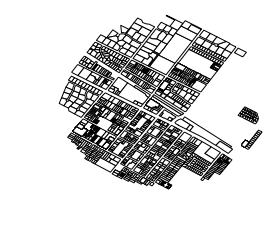

In [87]:
fruit_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/fruit_res.shp')
mp_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/mp_res.shp')
soto_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/soto_res.shp')
wv_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/wv_res.shp')
sl_pz = geopandas.read_file('GIS/Parcel_Zoning/Subset/sl_res.shp')

f, ax = plt.subplots(1, figsize=(4, 4))
ax = mp_pz.plot(ax = ax, color='white', edgecolor='black', linewidth=1)
ax.set_axis_off()
plt.show()

In [88]:
soto_pz.columns

Index(['level_0', 'index', 'arb', 'assetid', 'block', 'bpp', 'cncl_dist',
       'date_crtn_', 'time_crtn_', 'eng_dist', 'eng_dist_d', 'id', 'lot',
       'date_lst_m', 'time_lst_m', 'map_ref', 'mapsheet', 'mod', 'pin', 'pind',
       'shape_area', 'shape_leng', 'tract', 'key', 'name', 'lat', 'lon',
       'index_righ', 'zone_cmplt', 'zone_base', 'dist_stati', 'parcel_are',
       'parcel_len', 'parcel_quo', 'geometry'],
      dtype='object')

## Now to overlay footprints onto parcels to see building coverage

In [83]:
print(footprints.crs)
print(fruit_pz.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:4269'}


In [114]:
fruit_union = geopandas.overlay(fruit_pz, footprints, how='union')
mp_union = geopandas.overlay(mp_pz, footprints, how='union')
soto_union = geopandas.overlay(soto_pz, footprints, how='union')
wv_union = geopandas.overlay(wv_pz, footprints, how='union')
sl_union = geopandas.overlay(sl_pz, footprints, how='union')

In [141]:
fruit_union.head(10)

,index,apn,apn_sort,book,centroid_x,centroid_y,clca_categ,comments,date_creat,date_updat,...,ZNLABEL,zone_base,dist_stati,parcel_are,parcel_len,parcel_quo,footprint,geometry,vacant_area,lot_coverage
0,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,"POLYGON ((568590.8966519088 4181818.389824711,...",895.478733,0.764614
1,1227.0,33-2127-12,033 212701200,33,6.064281e+06,2.111528e+06,None,None,2004-06-07,2004-06-07,...,RM-3,Multi-Family Residential,765.265877,3358.252702,295.922028,0.481914,footprint,"POLYGON ((568596.1853737737 4181826.706370085,...",32.419664,0.990346
2,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,"POLYGON ((568586.7249581979 4181829.456771193,...",530.171507,0.860639
3,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,"POLYGON ((568565.6755116173 4181828.163646786,...",1679.421022,0.558547
4,5.0,33-2127-11,033 212701100,33,6.064269e+06,2.111500e+06,None,None,2004-06-07,2004-06-07,...,RM-3,Multi-Family Residential,756.169981,3804.304088,303.358662,0.519485,footprint,"POLYGON ((568569.8251446359 4181836.921305924,...",29.308943,0.992296
5,1227.0,33-2127-12,033 212701200,33,6.064281e+06,2.111528e+06,None,None,2004-06-07,2004-06-07,...,RM-3,Multi-Family Residential,765.265877,3358.252702,295.922028,0.481914,footprint,"POLYGON ((568577.9346004358 4181833.778773367,...",1445.607737,0.569536
6,3903.0,33-2127-13,033 212701300,33,6.064292e+06,2.111554e+06,None,None,2004-06-07,2004-06-07,...,RM-3,Multi-Family Residential,773.795311,3358.156238,295.919275,0.481909,footprint,"POLYGON ((568584.7002890513 4181840.307442043,...",74.441447,0.977833
7,6.0,33-2136-27-1,033 213602701,33,6.065076e+06,2.110309e+06,None,None,2004-06-07,2004-06-07,...,RM-2,Multi-Family Residential,622.041286,5958.258968,345.136906,0.628561,footprint,"POLYGON ((568845.2895201682 4181456.716715925,...",743.570309,0.875203
8,841.0,33-2136-26,033 213602600,33,6.065054e+06,2.110274e+06,None,None,2004-06-07,2004-06-07,...,RM-2,Multi-Family Residential,610.569085,4368.411536,319.668195,0.537199,footprint,"POLYGON ((568832.7103288593 4181464.242833236,...",60.545168,0.986140
9,6.0,33-2136-27-1,033 213602701,33,6.065076e+06,2.110309e+06,None,None,2004-06-07,2004-06-07,...,RM-2,Multi-Family Residential,622.041286,5958.258968,345.136906,0.628561,footprint,"POLYGON ((568819.8277034739 4181483.591780422,...",1608.621380,0.730018


In [144]:
mtc_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
fruit_union = fruit_union.to_crs(mtc_crs)
mp_union = mp_union.to_crs(mtc_crs)
soto_union = soto_union.to_crs(mtc_crs)
wv_union = wv_union.to_crs(mtc_crs)
sl_union = sl_union.to_crs(mtc_crs)

fruit_union['vacant_area'] = fruit_union['geometry'].area * 10.7639
mp_union['vacant_area'] = mp_union['geometry'].area * 10.7639
soto_union['vacant_area'] = soto_union['geometry'].area * 10.7639
wv_union['vacant_area'] = wv_union['geometry'].area * 10.7639
sl_union['vacant_area'] = sl_union['geometry'].area * 10.7639

fruit_union['lot_coverage'] = (fruit_union['parcel_are'] - fruit_union['vacant_area']) / fruit_union['parcel_are']
mp_union['lot_coverage'] = (mp_union['parcel_are'] - mp_union['vacant_area']) / mp_union['parcel_are']
soto_union['lot_coverage'] = (soto_union['parcel_are'] - soto_union['vacant_area']) / soto_union['parcel_are']
wv_union['lot_coverage'] = (wv_union['parcel_are'] - wv_union['vacant_area']) / wv_union['parcel_are']
sl_union['lot_coverage'] = (sl_union['parcel_are'] - sl_union['vacant_area']) / sl_union['parcel_are']

fruit_unbuilt = fruit_union[fruit_union['footprint'].isna()]
mp_unbuilt = mp_union[mp_union['footprint'].isna()]
wv_unbuilt = wv_union[wv_union['footprint'].isna()]
soto_unbuilt = soto_union[soto_union['footprint'].isna()]
sl_unbuilt = sl_union[sl_union['footprint'].isna()]

sl_unbuilt.head(3)

,level_0,index,arb,assetid,block,bpp,cncl_dist,date_crtn_,time_crtn_,eng_dist,...,zone_cmplt,zone_base,dist_stati,parcel_are,parcel_len,parcel_quo,footprint,geometry,vacant_area,lot_coverage
4347,1096.0,1255.0,None,1332358.0,None,5440024020,13,1992-11-18,00:00:00.000,C,...,R2-1VL,Multi-Family Residential,804.489739,6328.949993,357.710453,0.621555,NaN,"POLYGON ((937930.6426449837 3783542.765191211,...",4557.716539,0.279862
4348,1100.0,1259.0,1,1332394.0,None,5440014031,13,1992-11-18,00:00:00.000,C,...,R2-1VL,Multi-Family Residential,803.472866,3353.800448,269.373071,0.580818,NaN,"POLYGON ((937785.2301060559 3783533.873424825,...",1981.725317,0.409111
4349,1114.0,1275.0,None,1332466.0,None,5440010017,13,1992-11-18,00:00:00.000,C,...,R2-1VL,Multi-Family Residential,793.678490,7830.767081,404.793853,0.600548,NaN,"POLYGON ((937696.3567604544 3783511.342892472,...",5825.463794,0.256080


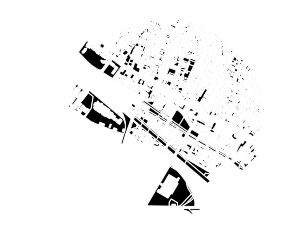

In [132]:
f, ax = plt.subplots(1, figsize=(4, 4))
ax = fruit_unbuilt.plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.show()

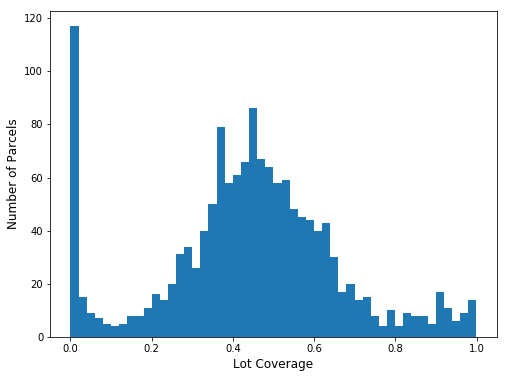

In [133]:
plt.figure(1, figsize=(8,6), )
plt.xlabel('Lot Coverage', fontsize=12)
plt.ylabel('Number of Parcels', fontsize=12)
ax = plt.hist(fruit_unbuilt['lot_coverage'], bins=50)
#plt.savefig('parcel_area_hist.png')
plt.show()

#### Exclude small parcels since these may be throwing off the results

I'll define small parcels as less than 1,000 sq ft

In [145]:
fruit_unbuilt = fruit_unbuilt[fruit_unbuilt['parcel_are'] > 1000]
mp_unbuilt = mp_unbuilt[mp_unbuilt['parcel_are'] > 1000]
wv_unbuilt = wv_unbuilt[wv_unbuilt['parcel_are'] > 1000]
soto_unbuilt = soto_unbuilt[soto_unbuilt['parcel_are'] > 1000]
sl_unbuilt = sl_unbuilt[sl_unbuilt['parcel_are'] > 1000]

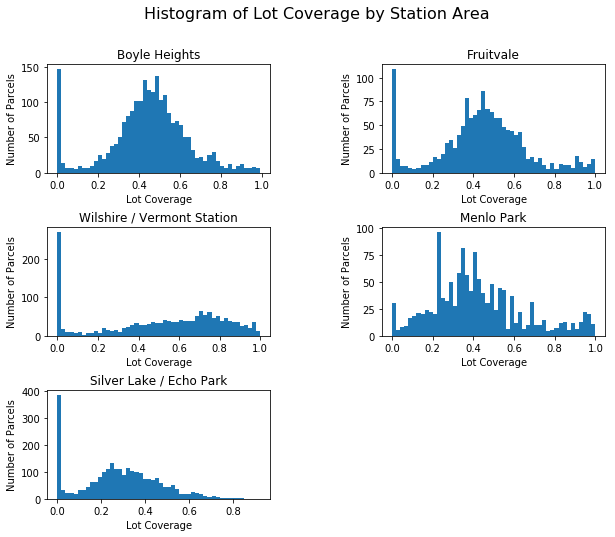

In [146]:
plt.figure(1, figsize=(10,8), )
plt.suptitle("Histogram of Lot Coverage by Station Area", fontsize=16)

ax = plt.subplot(322)
ax.set_title("Fruitvale")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(fruit_unbuilt['lot_coverage'], bins=50)

ax = plt.subplot(324)
ax.set_title("Menlo Park")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(mp_unbuilt['lot_coverage'], bins=50)

ax = plt.subplot(321)
ax.set_title("Boyle Heights")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(soto_unbuilt['lot_coverage'], bins=50)

ax = plt.subplot(323)
ax.set_title("Wilshire / Vermont Station")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(wv_unbuilt['lot_coverage'], bins=50)

ax = plt.subplot(325)
ax.set_title("Silver Lake / Echo Park")
ax.set_xlabel('Lot Coverage', fontsize=10)
ax.set_ylabel('Number of Parcels', fontsize=10)
#ax.set_xlim(0,20000)
ax.hist(sl_unbuilt['lot_coverage'], bins=50)

plt.subplots_adjust(wspace=.5, hspace=.5)
plt.savefig('lot_coverage_hist.png')
plt.show()

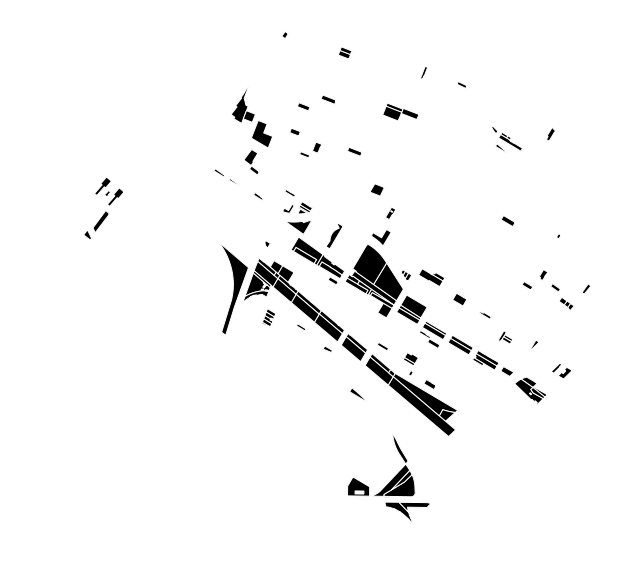

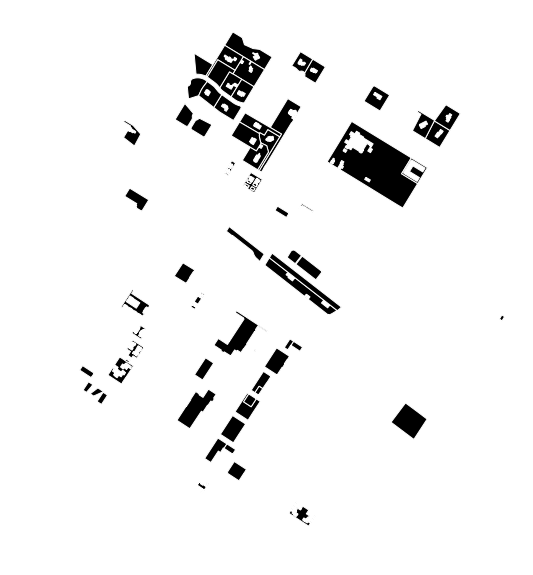

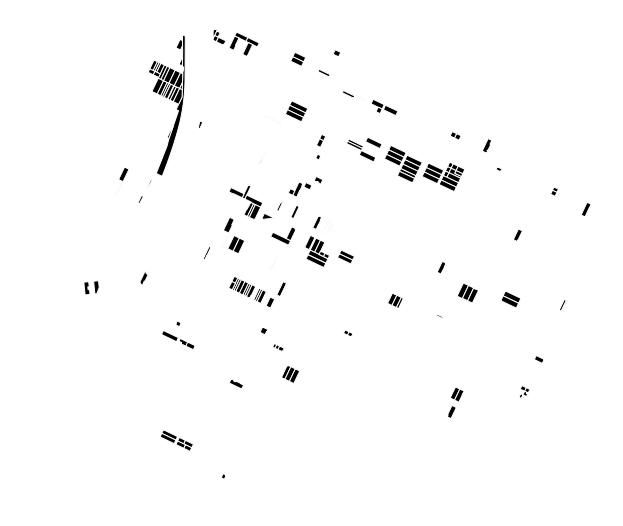

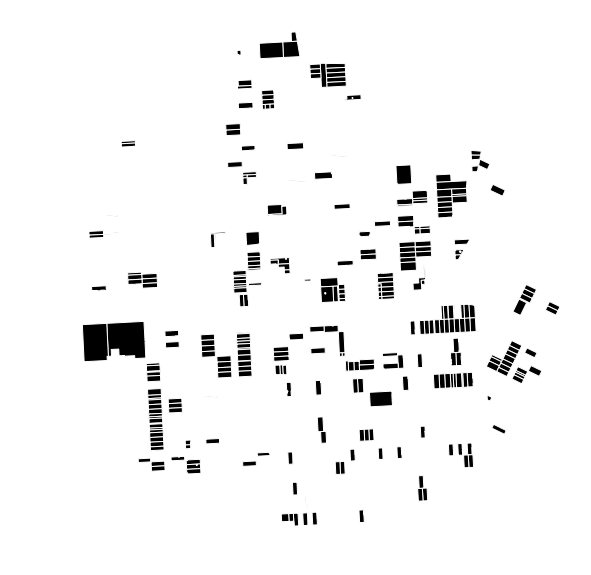

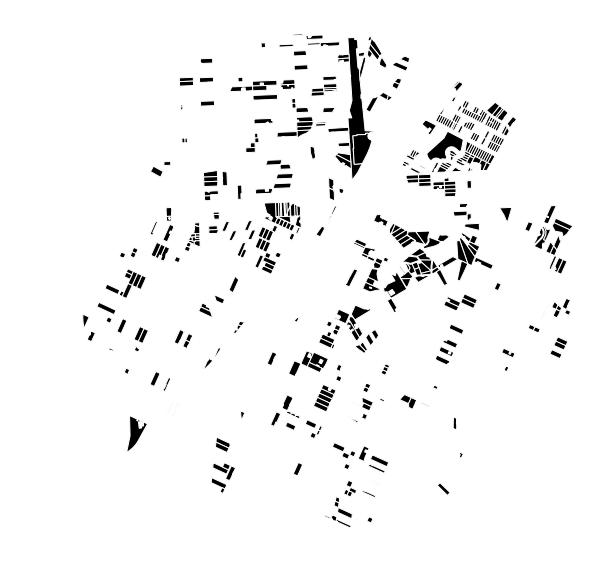

In [147]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax = fruit_unbuilt[fruit_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('fruit_vacant.png')

f, ax = plt.subplots(1, figsize=(10, 10))
ax = mp_unbuilt[mp_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('mp_vacant.png')

f, ax = plt.subplots(1, figsize=(10, 10))
ax = soto_unbuilt[soto_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('soto_vacant.png')

f, ax = plt.subplots(1, figsize=(10, 10))
ax = wv_unbuilt[wv_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('wv_vacant.png')

f, ax = plt.subplots(1, figsize=(10, 10))
ax = sl_unbuilt[sl_unbuilt['lot_coverage'] < 0.1].plot(ax = ax, color='black', edgecolor='white', linewidth=1)
ax.set_axis_off()
plt.savefig('sl_vacant.png')


In [148]:
mp_unbuilt[mp_unbuilt['APN'] ==  '061281040']

,index,APAGE,APN,APN_FLAG,BLOCK,BOOK,LOT,SBE_NO,SUBLOT,PARCEL_ID,...,gpz_z_labe,zone_base,dist_stati,parcel_are,parcel_len,parcel_quo,footprint,geometry,vacant_area,lot_coverage
2585,456.0,28,061281040,V,1,061,04,None,0,11608.0,...,None,Single-Family Residential,679.310362,39170.870818,893.478896,0.616603,NaN,"POLYGON ((572786.7058478837 4146170.9521839, 5...",35265.010305,0.099713


In [112]:
vacant_lots = unbuilt_area[unbuilt_area['lot_coverage'] < 0.01]

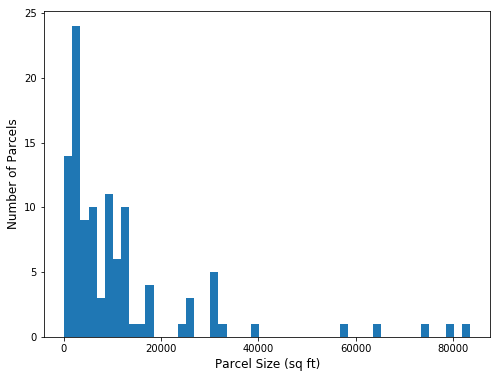

In [113]:
plt.figure(1, figsize=(8,6), )
plt.xlabel('Parcel Size (sq ft)', fontsize=12)
plt.ylabel('Number of Parcels', fontsize=12)
ax = plt.hist(vacant_lots['parcel_are'], bins=50)
#plt.savefig('parcel_area_hist.png')
plt.show()